In [2]:
import pandas as pd
from pydataset import data
from scipy import stats

### exercise 1:
in a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

print the first 3 rows


In [6]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


print the number of rows and columns (shape)

In [6]:
df_iris.shape

(150, 5)

print the column names

In [7]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

print the data type of each column

In [8]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

print the summary statistics for each of the numeric variables

In [9]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### exercise 2:
Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

In [12]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1m6pBkRPh3SwSdp1gUCOnDJnIR_Mp_PCuMOa3fVcBqSU/edit#gid=1023018493'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google_sheets = pd.read_csv(csv_export_url)
df_google_sheets.head()


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


assign the first 100 rows to a new dataframe, df_google_sheets_sample

In [13]:
df_google_sheets_sample = df_google_sheets.head(100)

print the number of rows of your original dataframe

In [24]:
len(df_google_sheets)
df_google_sheets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


print the first 5 column names

In [16]:
df_google_sheets.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

print the column names that have a data type of object

In [23]:
df_google_sheets.columns.where(df_google_sheets.dtypes == 'object').dropna()

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

compute the range for each of the numeric variables.

In [41]:
dfgs_num = df_google_sheets[df_google_sheets.columns.where((df_google_sheets.dtypes == 'int64')|(df_google_sheets.dtypes == 'float64')).dropna()]

dfgs_num.max() - dfgs_num.min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
tenure                 79.3
dtype: float64

### exercise 3:

Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [47]:
df_excel = pd.read_excel('KS_Kalpana_spreadsheet_exercises.xlsx')

assign the first 100 rows to a new dataframe, df_excel_sample

In [48]:
df_excel_sample = df_excel.head(100)

print the number of rows of your original dataframe

In [49]:
len(df_excel)

7049

print the first 5 column names

In [51]:
df_excel_sample.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

print the column names that have a data type of object

In [52]:
df_excel_sample.columns.where(df_excel_sample.dtypes == 'object').dropna()

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

compute the range for each of the numeric variables.

In [56]:
dfes_num = df_excel_sample[df_excel_sample.columns.where((df_excel_sample.dtypes == 'int64')|(df_excel_sample.dtypes == 'float64')).dropna()]

(dfes_num.max() - dfgs_num.min()).round(1)

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges        98.6
total_charges        8477.9
tenure                 74.2
dtype: float64

### execrise 3:
Read the data from this google sheet into a dataframe, df_google.

In [5]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)


print the first 3 rows

In [58]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


print the number of rows and columns

In [59]:
df_google.shape

(891, 12)

print the column names

In [60]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

print the data type of each column

In [61]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


print the summary statistics for each of the numeric variables

In [65]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


print the unique values for each of your categorical variables

In [6]:
google_cat = df_google[['Pclass','Sex','Embarked']]

for col in google_cat:
  print(google_cat[col].unique())


[3 1 2]
['male' 'female']
['S' 'C' 'Q' nan]


In [ ]:
def get_connection(db, user=user, host=host, password=password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

### Use the function defined in acquire.py to load the iris data.

In [5]:
import acquire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = acquire.get_iris_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


### Drop the species_id and measurement_id columns.

In [11]:
df = df.drop(columns='species_id')
df

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


### Rename the species_name column to just species.

In [12]:
df = df.rename(columns={'species_name':'species'})
df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


### Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [13]:
dummies = pd.get_dummies(df['species'], drop_first=True)
df = pd.concat([df,dummies], axis=1)
df

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [8]:
def prep_iris(df):
    df = df.drop(columns='species_id')
    df = df.rename(columns={'species_name':'species'})
    dummies = pd.get_dummies(df['species'], drop_first=True)
    df = pd.concat([df,dummies], axis=1)

    return(df)

## Using the Titanic dataset
### Use the function defined in acquire.py to load the Titanic data.

In [15]:
df = acquire.get_titanic_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


### Drop any unnecessary, unhelpful, or duplicated columns.

In [16]:
df = df.drop(columns=['passenger_id','class','deck','embarked','age'])
df

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1
887,1,1,female,0,0,30.0000,Southampton,1
888,0,3,female,1,2,23.4500,Southampton,0
889,1,1,male,0,0,30.0000,Cherbourg,1


the question didnt ask for us to fill missing data, but i did that here anyway.

In [17]:
def fill_embark(df):
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.survived)

    imputer = SimpleImputer(strategy='most_frequent')
    imputer = imputer.fit(train[['embark_town']])

    train[['embark_town']] = imputer.transform(train[['embark_town']])

    validate[['embark_town']] = imputer.transform(validate[['embark_town']])

    test[['embark_town']] = imputer.transform(test[['embark_town']])

    df = pd.concat([train,validate,test])
    return(df)

In [18]:
df = fill_embark(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 455 to 53
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embark_town  891 non-null    object 
 7   alone        891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [19]:
dummies = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
df = pd.concat([df, dummies],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 455 to 53
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   embark_town              891 non-null    object 
 7   alone                    891 non-null    int64  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Queenstown   891 non-null    uint8  
 10  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 65.3+ KB


### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [20]:
df=acquire.get_titanic_data()

In [21]:
def prep_titanic(df):
    df = df.drop(columns=['passenger_id','class','deck','embarked','age'])
    df = fill_embark(df)
    dummies = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummies],axis=1)
    return(df)

In [22]:
prepped = prep_titanic(df)


prepped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 455 to 53
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   embark_town              891 non-null    object 
 7   alone                    891 non-null    int64  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Queenstown   891 non-null    uint8  
 10  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 65.3+ KB


## Using the Telco dataset

### Use the function defined in acquire.py to load the Telco data.

In [41]:
df = acquire.get_telco_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [42]:
df = df.drop(columns=['payment_type_id','internet_service_type_id','contract_type_id','customer_id'])
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [43]:
dummies = dummies = pd.get_dummies(df[['gender','partner','dependents','phone_service','tech_support','churn','contract_type','internet_service_type','payment_type']], dummy_na=False, drop_first=[True])

df = pd.concat([df,dummies],axis=1)

df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,tech_support_No internet service,tech_support_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,1,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,0,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,0,0,1,0,0,0,1


### Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [26]:
b

### testing prep telco function

In [44]:
df = acquire.get_telco_data()
df = prep_telco(df)
df.info()

NameError: name 'prep_telco' is not defined

### exercise 1:
Acquire, prepare & split your data.

In [9]:
df_iris = acquire.get_iris_data()
prep_iris(df_iris)
train, test = train_test_split(df_iris, test_size = .2, random_state=123, stratify=df_iris.species_name)
train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.species_name)
train

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
70,2,versicolor,5.9,3.2,4.8,1.8
123,3,virginica,6.3,2.7,4.9,1.8
87,2,versicolor,6.3,2.3,4.4,1.3
3,1,setosa,4.6,3.1,1.5,0.2
15,1,setosa,5.7,4.4,1.5,0.4
53,2,versicolor,5.5,2.3,4.0,1.3
20,1,setosa,5.4,3.4,1.7,0.2
50,2,versicolor,7.0,3.2,4.7,1.4
54,2,versicolor,6.5,2.8,4.6,1.5
52,2,versicolor,6.9,3.1,4.9,1.5


### exercise 2:
Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

<AxesSubplot:title={'center':'distribution of sepal length'}>

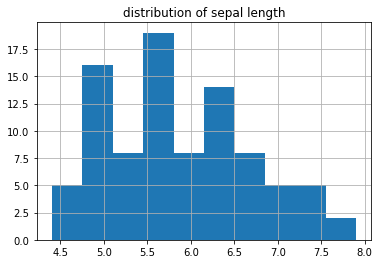

In [56]:
plt.title('distribution of sepal length')
train.sepal_length.hist()

<AxesSubplot:title={'center':'distribution of sepal width'}>

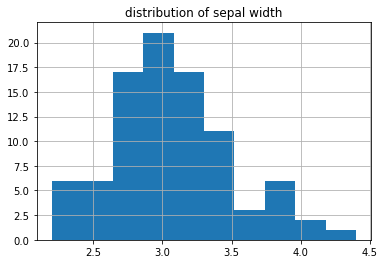

In [55]:
plt.title('distribution of sepal width')
train.sepal_width.hist()

<AxesSubplot:title={'center':'distribution of petal length'}>

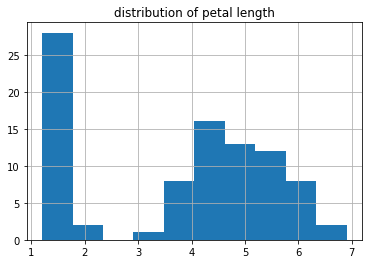

In [54]:
plt.title('distribution of petal length')
train.petal_length.hist()

<AxesSubplot:title={'center':'distribution of petal width'}>

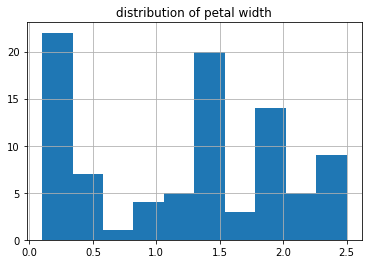

In [53]:
plt.title('distribution of petal width')
train.petal_width.hist()

In [57]:
train.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2.000000,5.875556,3.070000,3.782222,1.203333
std,0.821071,0.792282,0.436135,1.742114,0.755422
min,1.000000,4.400000,2.200000,1.200000,0.100000
25%,1.000000,5.225000,2.800000,1.600000,0.400000
50%,2.000000,5.800000,3.000000,4.250000,1.300000
75%,3.000000,6.400000,3.375000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


### take-aways:

-sepal length & width are noramlly distributed, but petal length & width aren't. 

-sepal length or width would likely be better for using a t test.

-petal length or width would likely be better for using a Mann Whitney test.

-sepal width has the lowest standard deviation.

### exercise 3:
Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

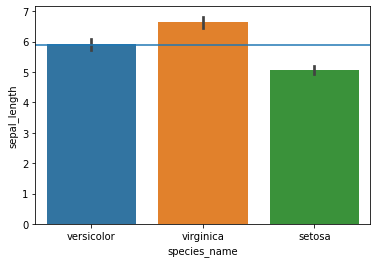

In [14]:
sns.barplot(x='species_name',y='sepal_length', data=train)
avg_sepal_length = train.sepal_length.mean()
plt.axhline(avg_sepal_length, label="Average sepal length")

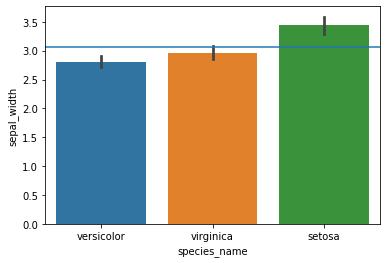

In [15]:
sns.barplot(x='species_name',y='sepal_width', data=train)
avg_sepal_width = train.sepal_width.mean()
plt.axhline(avg_sepal_width, label="Average sepal width")

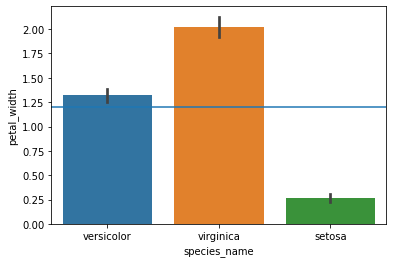

In [16]:
sns.barplot(x='species_name',y='petal_width', data=train)
avg_petal_width = train.petal_width.mean()
plt.axhline(avg_petal_width, label="Average petal width")

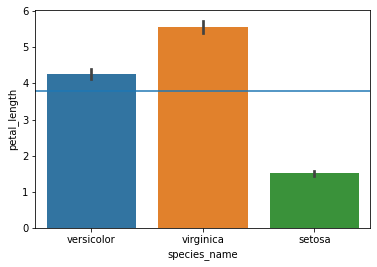

In [17]:
sns.barplot(x='species_name',y='petal_length', data=train)
avg_petal_length = train.petal_length.mean()
plt.axhline(avg_petal_length, label="Average petal length")

In [21]:
versicolor = train[train.species_name == 'versicolor']
virginica = train[train.species_name == 'virginica']

In [22]:
a = .05

from scipy import stats

null_hypothesis = "petal width of virginica are equal to or greater than petal length of versicolor"
alternative_hypothesis = "petal width of virginica are less than petal length of versicolor"

# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(versicolor.petal_width, virginica.petal_width, alternative="greater")
